In [1]:
import numpy as np 
import pandas as pd
import sklearn.cluster
import matplotlib.pyplot as plt
import pandas_datareader.data as web


In [2]:
# COVID
# https://github.com/nytimes/covid-19-data/blob/master/us.csv
url = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us.csv'
df_Covid = pd.read_csv(url,index_col=0,parse_dates=[0])
# save the dataframe to local folder as a csv file with name "Covid"
df_Covid.to_csv("Covid.csv")

In [228]:
# Pharmacy Stock
ticker_Pha = ["ABT", "ABBV","AMRX","AZN","RCUS"]
start_date = "2020-01-21"
end_date = dt.now()
df_Pha = pd.DataFrame()

for t in ticker_Pha:
    ticker_data = web.DataReader(t, "yahoo", start_date, end_date)
    ticker_data["Name"] = t
    ticker_data = ticker_data.join(df_Covid)
    df_Pha = df_Pha.append(ticker_data)

df_Pha.to_csv("Pharmacy.csv")

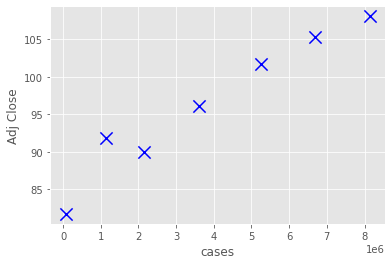

In [229]:
ABT = df_Pha.loc[df_Pha['Name'] == "ABT"]
ABT = ABT.dropna()
# k-means cluster
columns = ["cases","Adj Close"]
kmeans = kmeans = sklearn.cluster.KMeans(n_clusters=7)
kmeans.fit(ABT[columns])
centers = pd.DataFrame(kmeans.cluster_centers_, columns=columns)
centers.plot.scatter(columns[0], columns[1], color="blue", marker="x", s=150)
plt.scatter(ABT["cases"], ABT["Adj Close"])
plt.xlabel("Cases")
plt.ylabel("ABT Price")

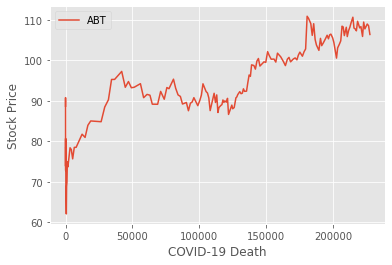

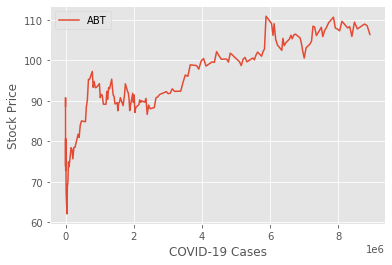

In [230]:
x_1 = ABT["deaths"]
x_2 = ABT["cases"]
y = ABT["Adj Close"]

plt.figure(1)
plt.xlabel("COVID-19 Death")
plt.ylabel("Stock Price")
plt.plot(x_1, y, label="ABT")
plt.legend()
plt.savefig("ABT.png")

plt.figure(2)
plt.xlabel("COVID-19 Cases")
plt.ylabel("Stock Price")
plt.plot(x_2, y, label="ABT")
plt.legend()
plt.savefig("ABT_C.png")

In [231]:
# Biotech Stock
ticker_Bio = ["XBIT","VNDA","INVA","GMAB","REGN"]
start_date = "2020-01-21"
end_date = dt.now()
df_Bio = pd.DataFrame()

for t in ticker_Bio:
    ticker_data = web.DataReader(t, "yahoo", start_date, end_date)
    ticker_data["Name"] = t
    ticker_data = ticker_data.join(df_Covid)
    df_Bio = df_Bio.append(ticker_data)

df_Bio.to_csv("Biotech.csv")    